In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Classification/binary_classification_2d_data.xlsx')
data

,Feature1,Feature2,Label
0,3.671814,5.196861,1
1,2.496714,1.861736,0
2,1.536582,1.534270,0
3,4.399361,4.708306,1
4,5.208864,3.040330,1
5,1.765847,1.765863,0
6,6.465649,4.774224,1
7,4.986503,3.942289,1
8,1.530526,2.542560,0
9,4.455617,5.110923,1


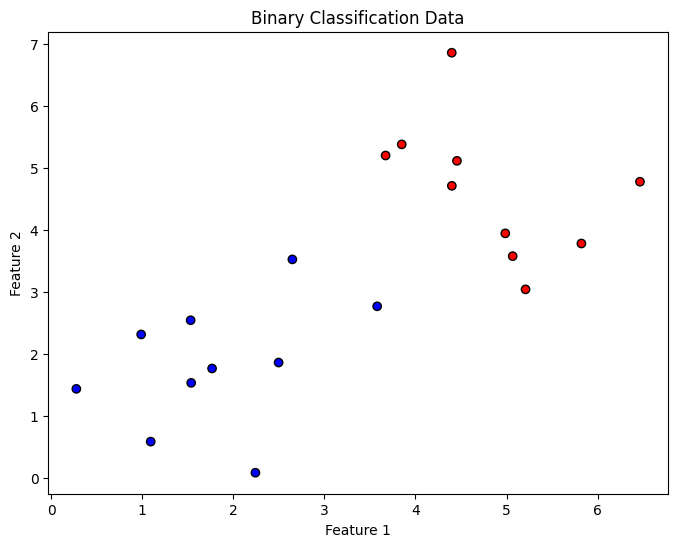

In [3]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature1'], data['Feature2'], c=data['Label'], cmap='bwr', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Data')
plt.show()

In [4]:
X = data.drop('Label', axis=1)

y = data['Label']

# Perceptron: sklearn

In [5]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Initialize the Perceptron model
clf = Perceptron(max_iter=1000, eta0=0.01, random_state=42, fit_intercept=True)

# Fit the model on the training data
clf.fit(X, y)

# Optional: print the learned weights and intercept
print("Weights:", clf.coef_)
print("Bias (intercept):", clf.intercept_)


Weights: [[0.01726213 0.00908114]]
Bias (intercept): [-0.09]


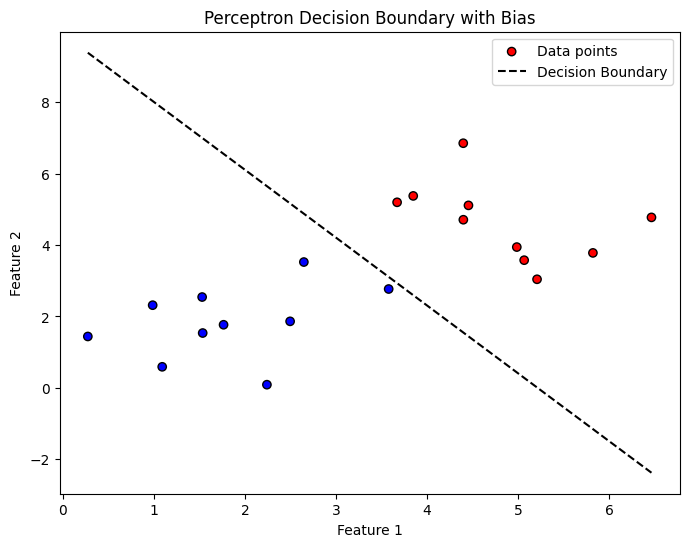

In [6]:
# Extract the bias weight
bias_weight = clf.intercept_  # Assuming the last weight corresponds to the bias

w = clf.coef_.flatten()

# Calculate the decision boundary
x1 = np.linspace(X['Feature1'].min(), X['Feature1'].max(), 100)
x2 = -(w[0]/w[1]) * x1 - (bias_weight/w[1])

# Plot the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X['Feature1'], X['Feature2'], c=y, cmap='bwr', edgecolor='k', label='Data points')
plt.plot(x1, x2, 'k--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary with Bias')
plt.legend()
plt.show()

# Perceptron: Scratch

In [12]:
X['Bias'] = 1

## Using Intuition

In [13]:
def step(x):
  if x > 0:
    return 1
  else :
    return 0

In [14]:
def h(x, w, f):
  return f(np.dot(w.T, x))

In [15]:
w = pd.Series(0, index=X.columns)
alpha = 0.1
epochs = 100

for epoch in range(epochs):
  for i in range(data.shape[0]):
    x = X.iloc[i]
    prediction = h(x, w, step)
    if y[i] != prediction:
      w = w + alpha * x * (y[i] - prediction)

w

,0
Feature1,0.159480
Feature2,0.199282
Bias,-1.300000


In [16]:
def plot_decision_boundary(w, y):
  # Extract the bias weight
  bias_weight = w[-1]  # Assuming the last weight corresponds to the bias

  # Calculate the decision boundary
  x1 = np.linspace(X['Feature1'].min(), X['Feature1'].max(), 100)
  x2 = -(w[0]/w[1]) * x1 - (bias_weight/w[1])

  # Plot the data and decision boundary
  plt.figure(figsize=(8, 6))
  plt.scatter(X['Feature1'], X['Feature2'], c=y, cmap='bwr', edgecolor='k', label='Data points')
  plt.plot(x1, x2, 'k--', label='Decision Boundary')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Perceptron Decision Boundary with Bias')
  plt.legend()
  plt.show()

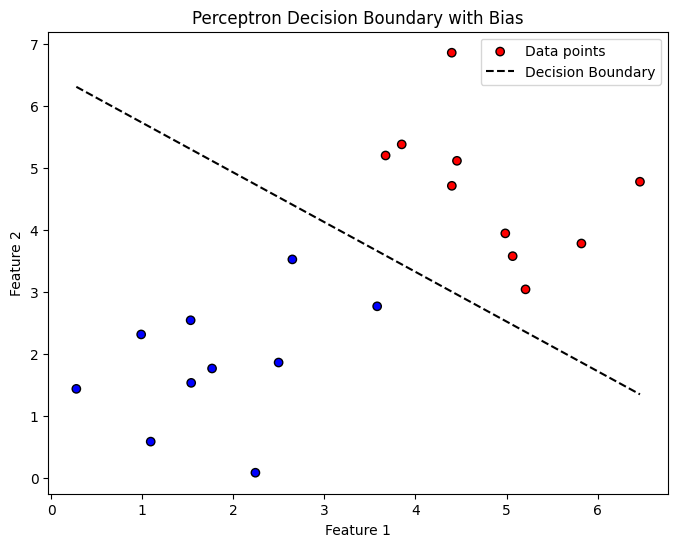

In [17]:
plot_decision_boundary(w, y)

## Using hinge loss: max(0, -y⋅(w⋅x))

In [18]:
y_signum = data['Label'].map({0: -1, 1: 1})

In [21]:
w = pd.Series(0, index=X.columns)

alpha = 0.01
epochs = 1000

for epoch in range(epochs):
    # Shuffle the data at each epoch
    shuffled_indices = np.random.permutation(X.index)

    for i in shuffled_indices:
        x = X.iloc[i]
        w_dot_x = np.dot(w, x)

        # Weight update only if there's a misclassification
        if y_signum[i] * w_dot_x <= 0:  # Misclassified
            w = w + alpha * x * y_signum[i]

print(w)

Feature1    0.036612
Feature2    0.021045
Bias       -0.220000
dtype: float64


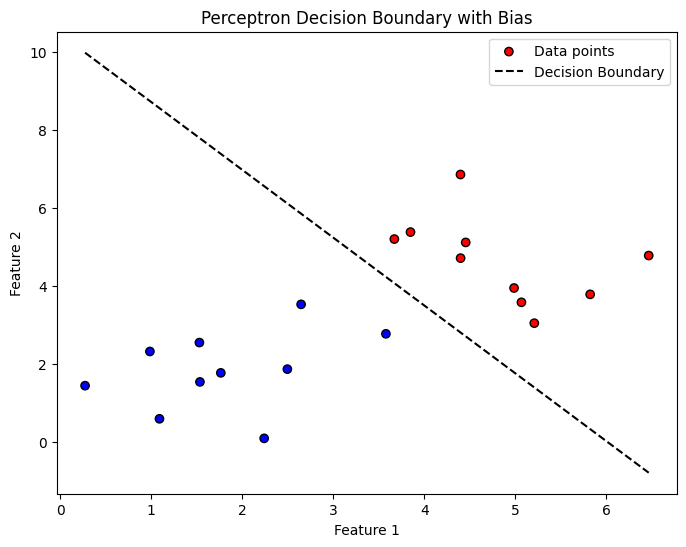

In [22]:
plot_decision_boundary(w, y_signum)